# Exploratory Data Analysis:

In [1]:
from tqdm import tqdm
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup
import time
import random
import csv
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data Frame (After Setp 2).csv')
df2 = df.copy()
df2 = df2.drop('Name', axis=1)

In [3]:
df2

,Country,English Level,Price,Diploma,Certificate,Response Time,No Of Lessons,Stars,Reviews,Popularity Score
0,United States of America,A2,126,No,No,5,6473,4.9,65,8.883275
1,United States of America,A1,52,No,No,24,560,5.0,8,4.515450
2,Ghana,Native,45,Yes,No,1,10328,4.8,117,9.927292
3,United States of America,Native,74,Yes,Yes,1,423,5.0,6,3.890756
4,United Kingdom,Native,67,No,Yes,7,7444,4.8,156,10.526998
...,...,...,...,...,...,...,...,...,...,...
7303,United States of America,Native,104,Yes,Yes,8,1156,5.0,6,3.890756
7304,Egypt,C1,37,No,Yes,2,30,5.0,2,1.505150
7305,United States of America,Native,149,Yes,No,2,62,5.0,3,2.385606
7306,France,Native,75,Yes,Yes,4,531,5.0,5,3.494850


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7308 entries, 0 to 7307
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           7308 non-null   object 
 1   English Level     7308 non-null   object 
 2   Price             7308 non-null   int64  
 3   Diploma           7308 non-null   object 
 4   Certificate       7308 non-null   object 
 5   Response Time     7308 non-null   int64  
 6   No Of Lessons     7308 non-null   int64  
 7   Stars             7308 non-null   float64
 8   Reviews           7308 non-null   int64  
 9   Popularity Score  7308 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 571.1+ KB


We have generated a boxplot graph that represents all the columns in our dataset. This visual representation allows us to identify and analyze any anomalies or outliers present in the data. By examining the boxplots for each column, we can gain insights into the distribution, central tendency, and variability of the values within each column. This analysis aids in detecting any unusual data points that deviate significantly from the overall pattern, helping us identify potential errors, data quality issues, or interesting observations in our dataset.

<Figure size 640x480 with 0 Axes>

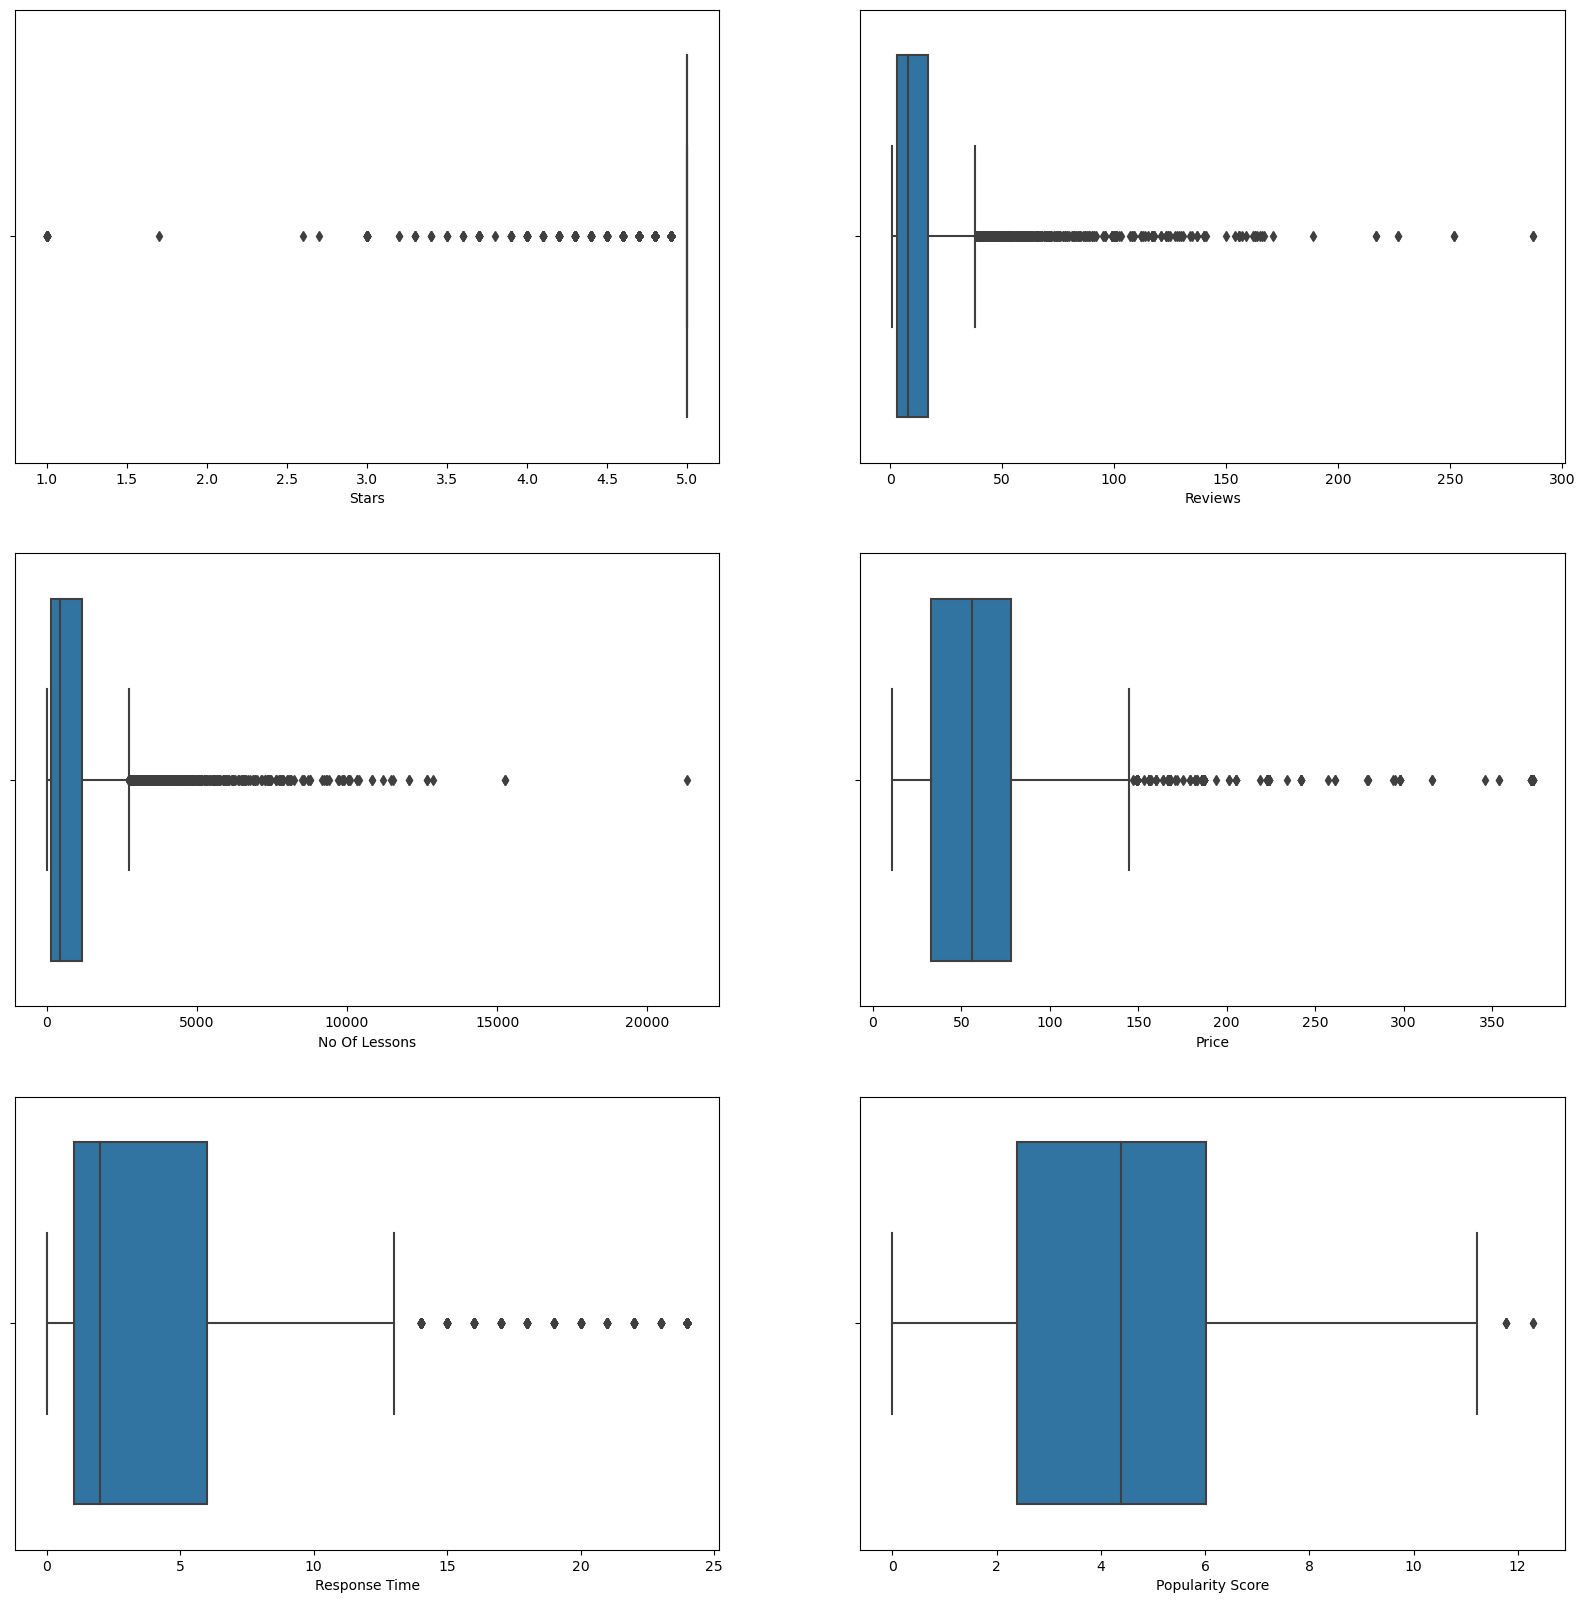

In [5]:
plt.clf()
fig, axs = plt.subplots(3, 2, figsize=(20, 20))
sns.boxplot(data=df2, x='Stars', ax=axs[0, 0])
sns.boxplot(data=df2, x='Reviews', ax=axs[0, 1])
sns.boxplot(data=df2, x='No Of Lessons', ax=axs[1, 0])
sns.boxplot(data=df2, x='Price', ax=axs[1, 1])
sns.boxplot(data=df2, x='Response Time', ax=axs[2, 0])
sns.boxplot(data=df2, x='Popularity Score', ax=axs[2, 1])

plt.show()

After observing the boxplots, we identified outliers in the "Price" and "Number of Lessons" columns. Recognizing the potential impact of outliers on data analysis and modeling, we proceeded to handle these outliers using appropriate techniques. However, during step 4, we observed that our machine learning model yielded better results when we excluded the outlier handling step.

Handling outliers in data analysis is a common practice to mitigate their influence on statistical measures and model performance. However, in this particular case, the outliers in the "Price" and "Number of Lessons" columns did not significantly affect the predictive capabilities of our model. Therefore, we made the decision to omit the outlier handling step and retain the original dataset.


In [6]:
# # outlier treatment for No Of Lessons
# Q1 = df2['No Of Lessons'].quantile(0.25)
# Q3 = df2['No Of Lessons'].quantile(0.75)
# IQR = Q3 - Q1
# df2 = df2[(df2['No Of Lessons'] >= Q1 - 1.5 * IQR) & (df2['No Of Lessons'] <= Q3 + 1.5 * IQR)]
# plt.boxplot(df2['No Of Lessons'])

In [7]:
# # outlier treatment for Price
# Q1 = df2['Price'].quantile(0.25)
# Q3 = df2['Price'].quantile(0.75)
# IQR = Q3 - Q1
# df2 = df2[(df2['Price'] >= Q1 - 1.5 * IQR) & (df2['Price'] <= Q3 + 1.5 * IQR)]
# plt.boxplot(df2['Price'])

In [8]:
# plt.clf()
# fig, axs = plt.subplots(3, 2, figsize=(20, 20))
# sns.boxplot(data=df2, x='Stars', ax=axs[0, 0])
# sns.boxplot(data=df2, x='Reviews', ax=axs[0, 1])
# sns.boxplot(data=df2, x='No Of Lessons', ax=axs[1, 0])
# sns.boxplot(data=df2, x='Price', ax=axs[1, 1])
# sns.boxplot(data=df2, x='Response Time', ax=axs[2, 0])
# sns.boxplot(data=df2, x='Popularity Score', ax=axs[2, 1])

# plt.show()

We have created a pie chart to visually represent the distribution of English levels in our dataset. The pie chart provides a clear depiction of the proportion of each English level category within the dataset

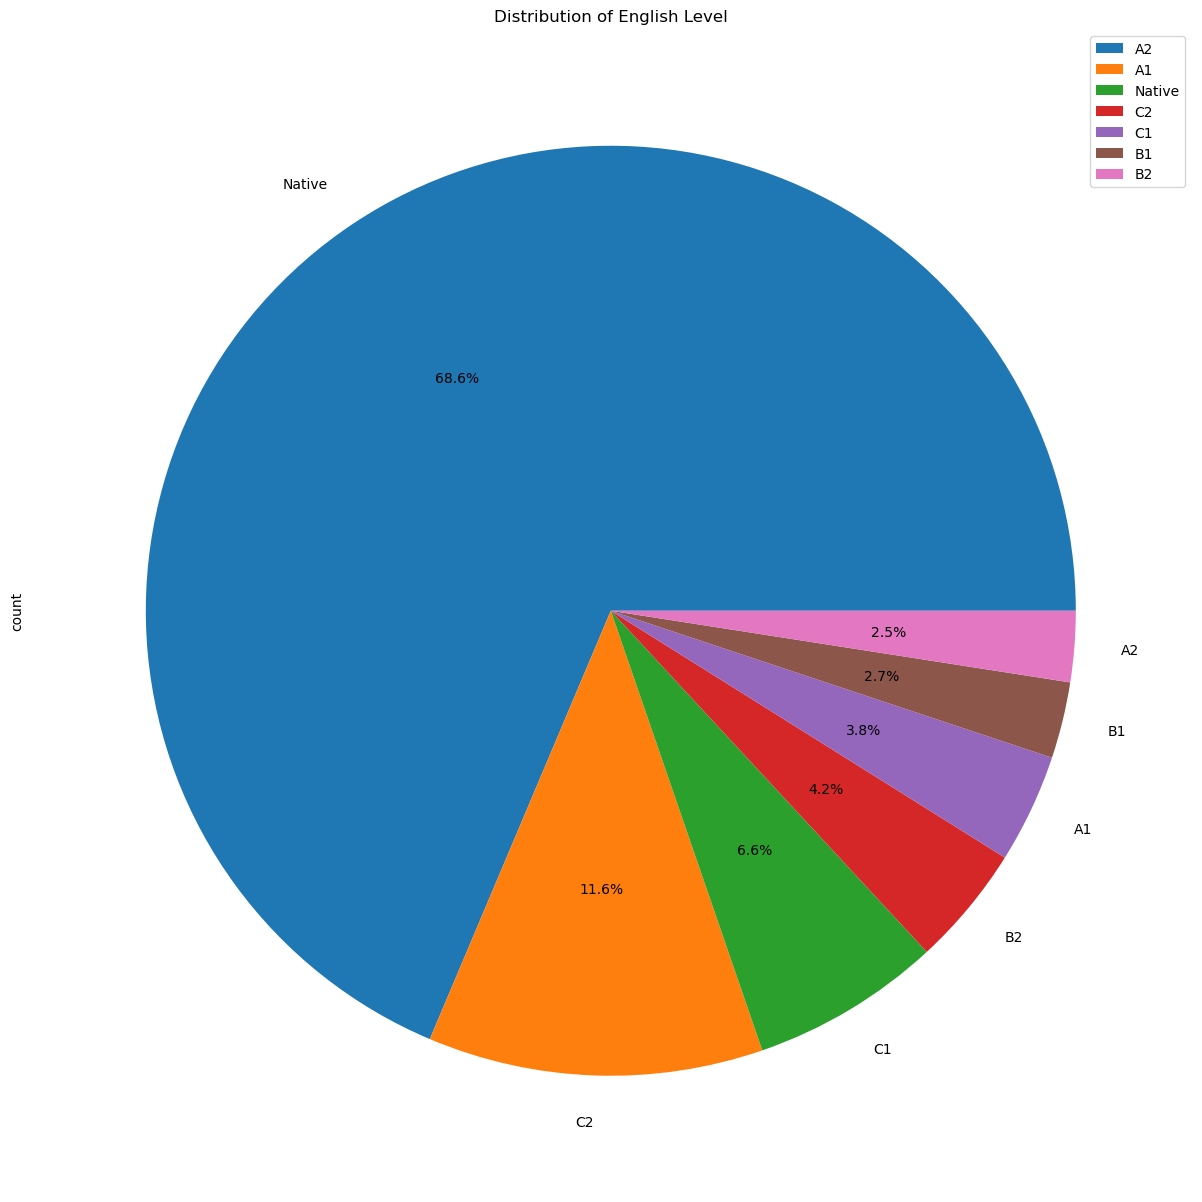

In [9]:
fig = plt.figure(figsize=(15,20))

df2['English Level'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of English Level')  # Add a title for the chart
plt.legend(df2['English Level'].unique())  # Add a legend based on unique category values
plt.show()

The graph depicting the number of reviews by the number of lessons shows a clear linear relationship. As the number of lessons increases, there is a proportional increase in the number of reviews. This suggests a strong correlation between the two variables, indicating that students who have more lessons tend to provide more feedback or reviews.

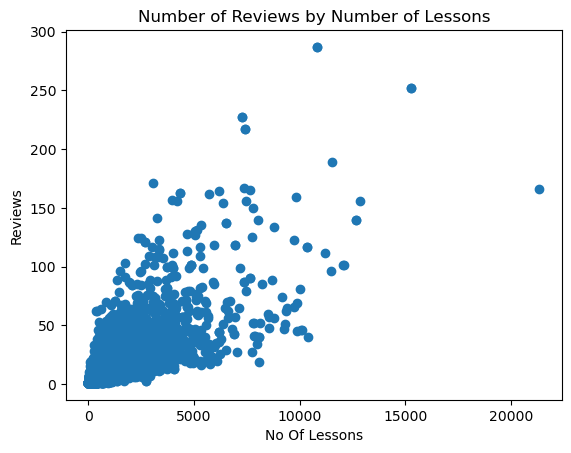

In [10]:
plt.scatter(df2['No Of Lessons'], df2['Reviews'])
plt.xlabel('No Of Lessons')
plt.ylabel('Reviews')
plt.title('Number of Reviews by Number of Lessons')

plt.show()

The graph illustrating the number of reviews by the number of lessons taught reveals an interesting observation. Regardless of the number of lessons taught, the majority of teachers received ratings above 3.5 stars. This suggests that the quality of teaching, as perceived by students and reflected in their reviews, remains consistently high, irrespective of the quantity of lessons delivered

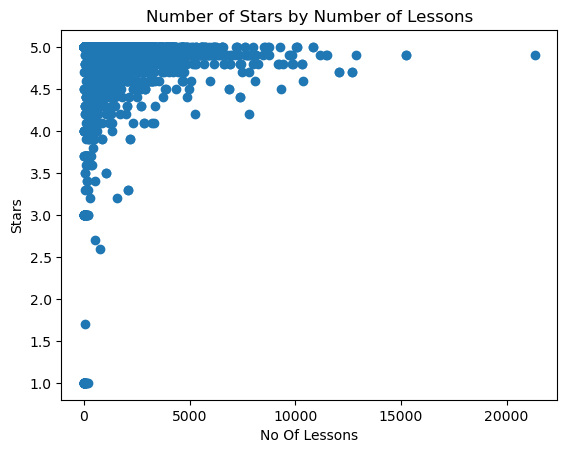

In [11]:
plt.scatter(df2['No Of Lessons'], df2['Stars'])
plt.xlabel('No Of Lessons')
plt.ylabel('Stars')
plt.title('Number of Stars by Number of Lessons')


plt.show()

The graph depicting the number of reviews by the number of stars is particularly intriguing as it inspired us to create a new column called "popularity." This graph reveals an interesting trend where tutors with a low number of reviews can still achieve top ratings, similar to tutors who have received a higher volume of reviews.

This observation suggests that star ratings are not solely dependent on the number of reviews a tutor has received. It implies that even with a limited number of reviews, a tutor can excel in terms of the quality of their teaching and garner high ratings from students.

Based on this insight, we decided to introduce the "popularity" column as a means to capture and measure the overall popularity and success of tutors, taking into account both the number of reviews and the corresponding star ratings they have received. This new column allows us to assess the tutors' overall reputation and appeal, providing a more comprehensive evaluation of their performance beyond just the number of reviews.

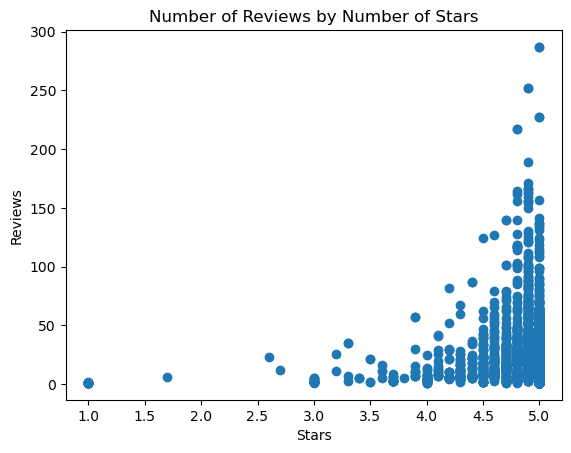

In [12]:
plt.scatter(df2['Stars'], df2['Reviews'])
plt.xlabel('Stars')
plt.ylabel('Reviews')
plt.title('Number of Reviews by Number of Stars')
plt.show()

The graph illustrating the relationship between the "Popularity Score" and the number of lessons demonstrates the impact of the newly created column. This graph highlights how the "Popularity Score" captures the combined influence of factors such as star ratings and the number of reviews, providing a comprehensive measure of a tutor's popularity.

By examining the graph, we can observe how the "Popularity Score" varies across different numbers of lessons. This showcases the correlation between the tutors' teaching experience, as indicated by the number of lessons taught, and their overall popularity among students.

The graph reaffirms the effectiveness of the new "Popularity Score" column in assessing and understanding the relative popularity and success of tutors, considering both their teaching experience and the feedback they have received. It serves as a valuable tool for evaluating and comparing tutors based on their overall appeal and performance, offering insights into the impact of the new column on our analysis.

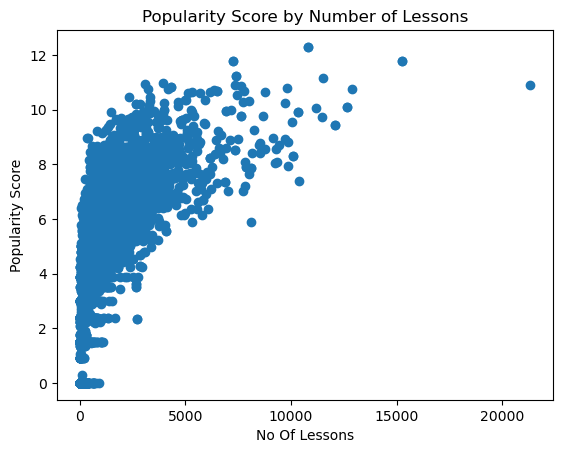

In [13]:
plt.scatter(df2['No Of Lessons'], df2['Popularity Score'])
plt.xlabel('No Of Lessons')
plt.ylabel('Popularity Score')
plt.title('Popularity Score by Number of Lessons')
plt.show()

The 3D scatter plot illustrates the relationships between the number of lessons, price, and popularity score for tutors. It provides a visual representation of how these variables interact with each other in a concise manner.

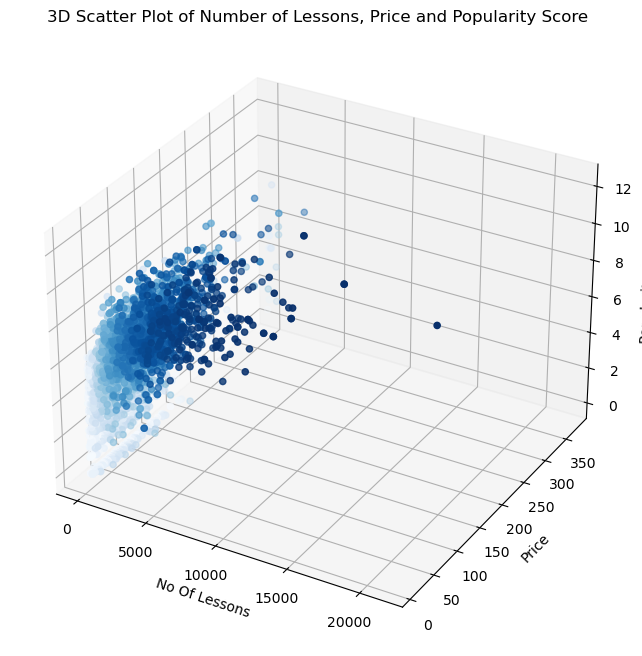

In [14]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
x = df2['No Of Lessons']
y = df2['Price']
z = df2['Popularity Score']

categories = pd.Categorical(df2['No Of Lessons'])
color_map = plt.colormaps['Blues']

scatter_colors = color_map(categories.codes / len(categories.categories))
ax.scatter(x, y, z, c=scatter_colors)

ax.set_xlabel('No Of Lessons')
ax.set_ylabel('Price')
ax.set_zlabel('Popularity Score')

plt.title('3D Scatter Plot of Number of Lessons, Price and Popularity Score')
plt.show()

The graph presents a visual representation of the relationship between the country of tutors and the corresponding number of lessons they have taught. By analyzing the graph, we can discern variations and patterns in the distribution of lessons among tutors from different countries. This visualization provides insights into the potential influence of a tutor's country of origin on their teaching experience, as reflected in the number of lessons they have conducted.

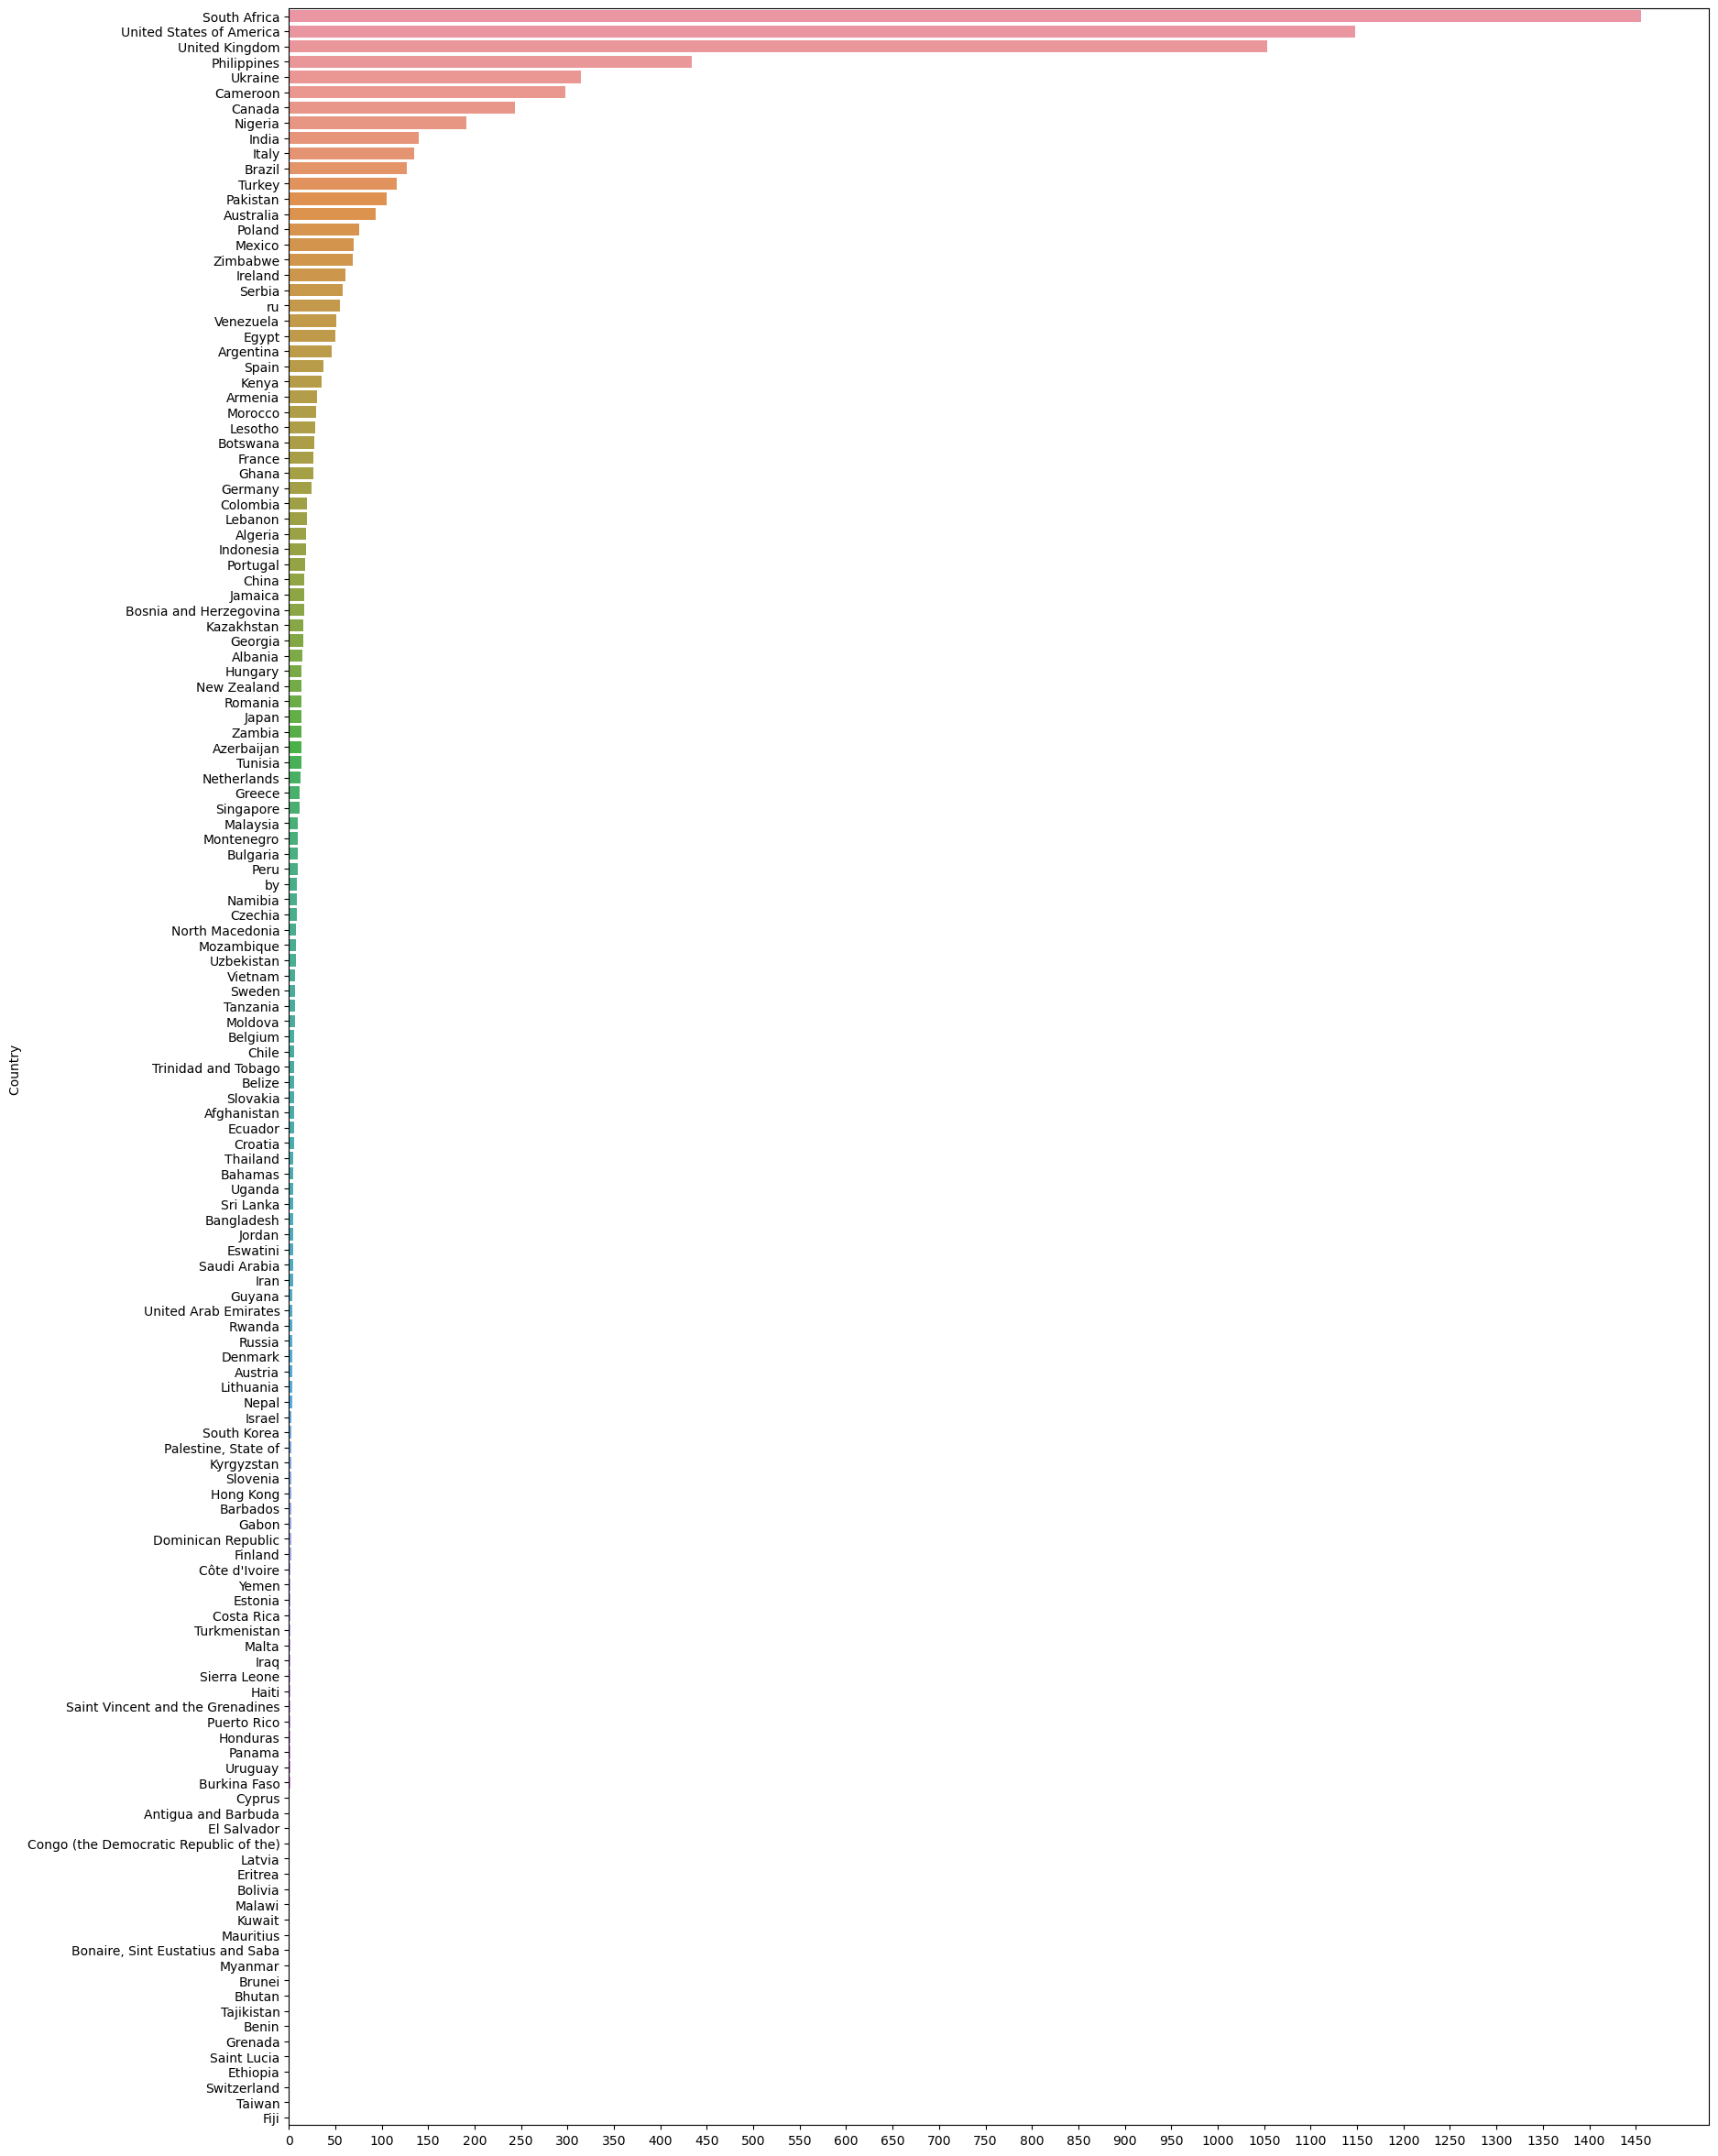

In [15]:
platCountry = pd.crosstab(df2['Country '],df2['No Of Lessons'])
platCountryTotal = platCountry.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(20,30))
sns.barplot(y = platCountryTotal.index, x = platCountryTotal.values, orient='h')
plt.ylabel = "Country "
plt.xlabel = "No Of Lessons"


interval_size = 50  # Specify the desired interval size
plt.xticks(range(0, max(platCountryTotal.values) + 1, interval_size))
plt.show()

The graph displays the relationship between the English level of tutors and their respective prices. It allows us to examine how the pricing varies across different English proficiency levels. Interestingly, the graph reveals that native speakers, who are generally assumed to possess the highest level of English proficiency, do not consistently command the highest prices.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'B1'),
  Text(1, 0, 'A2'),
  Text(2, 0, 'B2'),
  Text(3, 0, 'A1'),
  Text(4, 0, 'Native'),
  Text(5, 0, 'C2'),
  Text(6, 0, 'C1')])

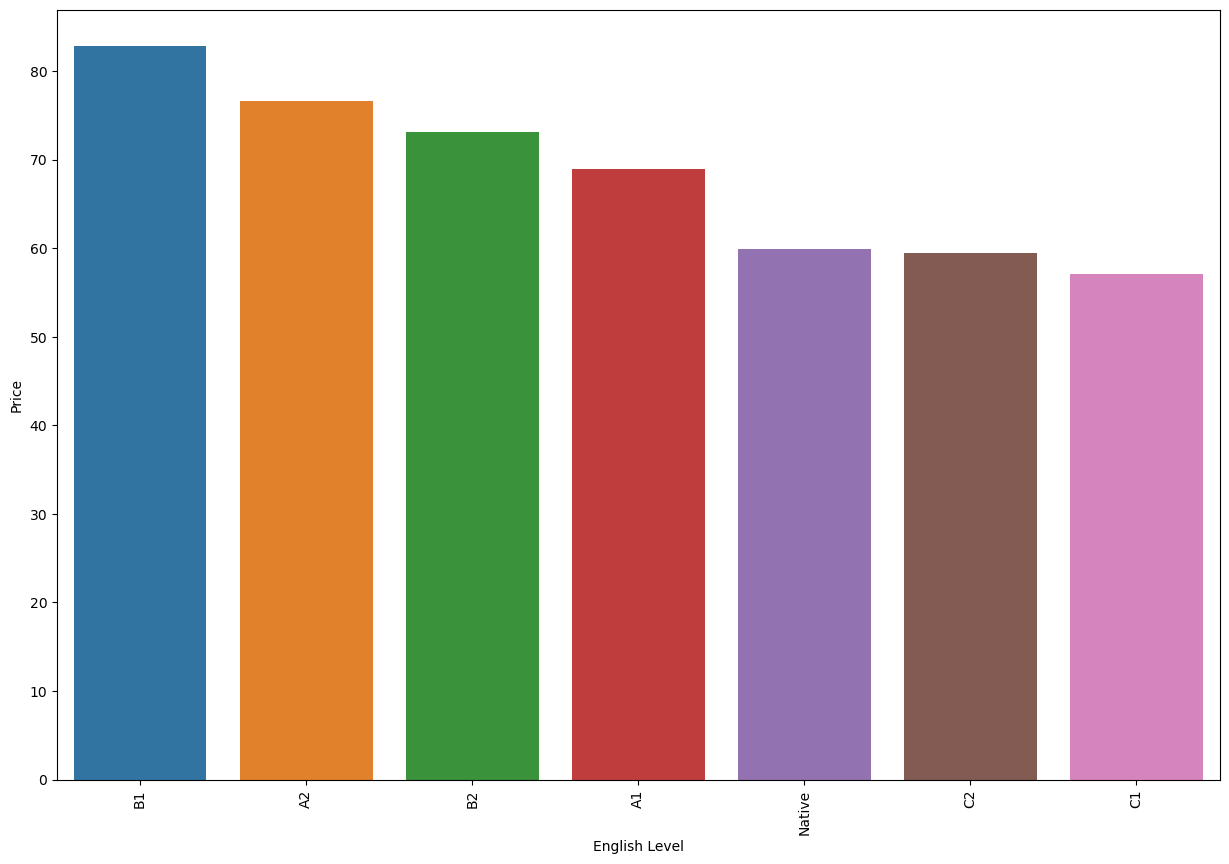

In [16]:
data_platform = df2.groupby(by=['English Level'])['Price'].mean()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Price'], ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x="English Level", y="Price", data=data_platform)
plt.xticks(rotation=90)

The graph depicting the relationship between popularity score and price reveals a mild linear trend, but we do not observe a strong connection between these two variables. While there appears to be a slight inclination towards higher popularity scores at higher price points, the relationship is not definitive or pronounced.

This suggests that the popularity score of tutors is influenced by factors beyond just the price they charge.
It is important to note that popularity score is likely influenced by a combination of factors, and price alone does not appear to be the sole determinant. Therefore, while there may be some correlation between popularity score and price, it is not strong enough to rely on price as the sole indicator or predictor of a tutor's popularity.

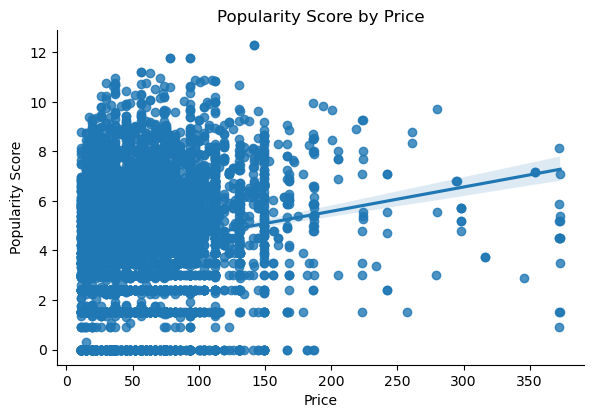

In [17]:
sns.pairplot(data=df, x_vars=['Price'], y_vars='Popularity Score', kind='reg', height=4, aspect=1.5)
plt.title('Popularity Score by Price')
plt.show()

In the graph depicting the relationship between response time and popularity score, we observe that there is no strong connection or correlation between these two variables. The scatter plot does not exhibit a clear pattern or trend that suggests a significant relationship between the response time of tutors and their corresponding popularity score.

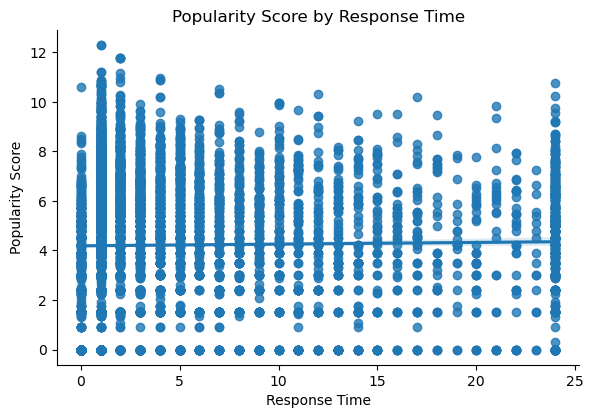

In [18]:
sns.pairplot(data=df, x_vars=['Response Time'], y_vars='Popularity Score', kind='reg', height=4, aspect=1.5)
plt.title('Popularity Score by Response Time')
plt.show()

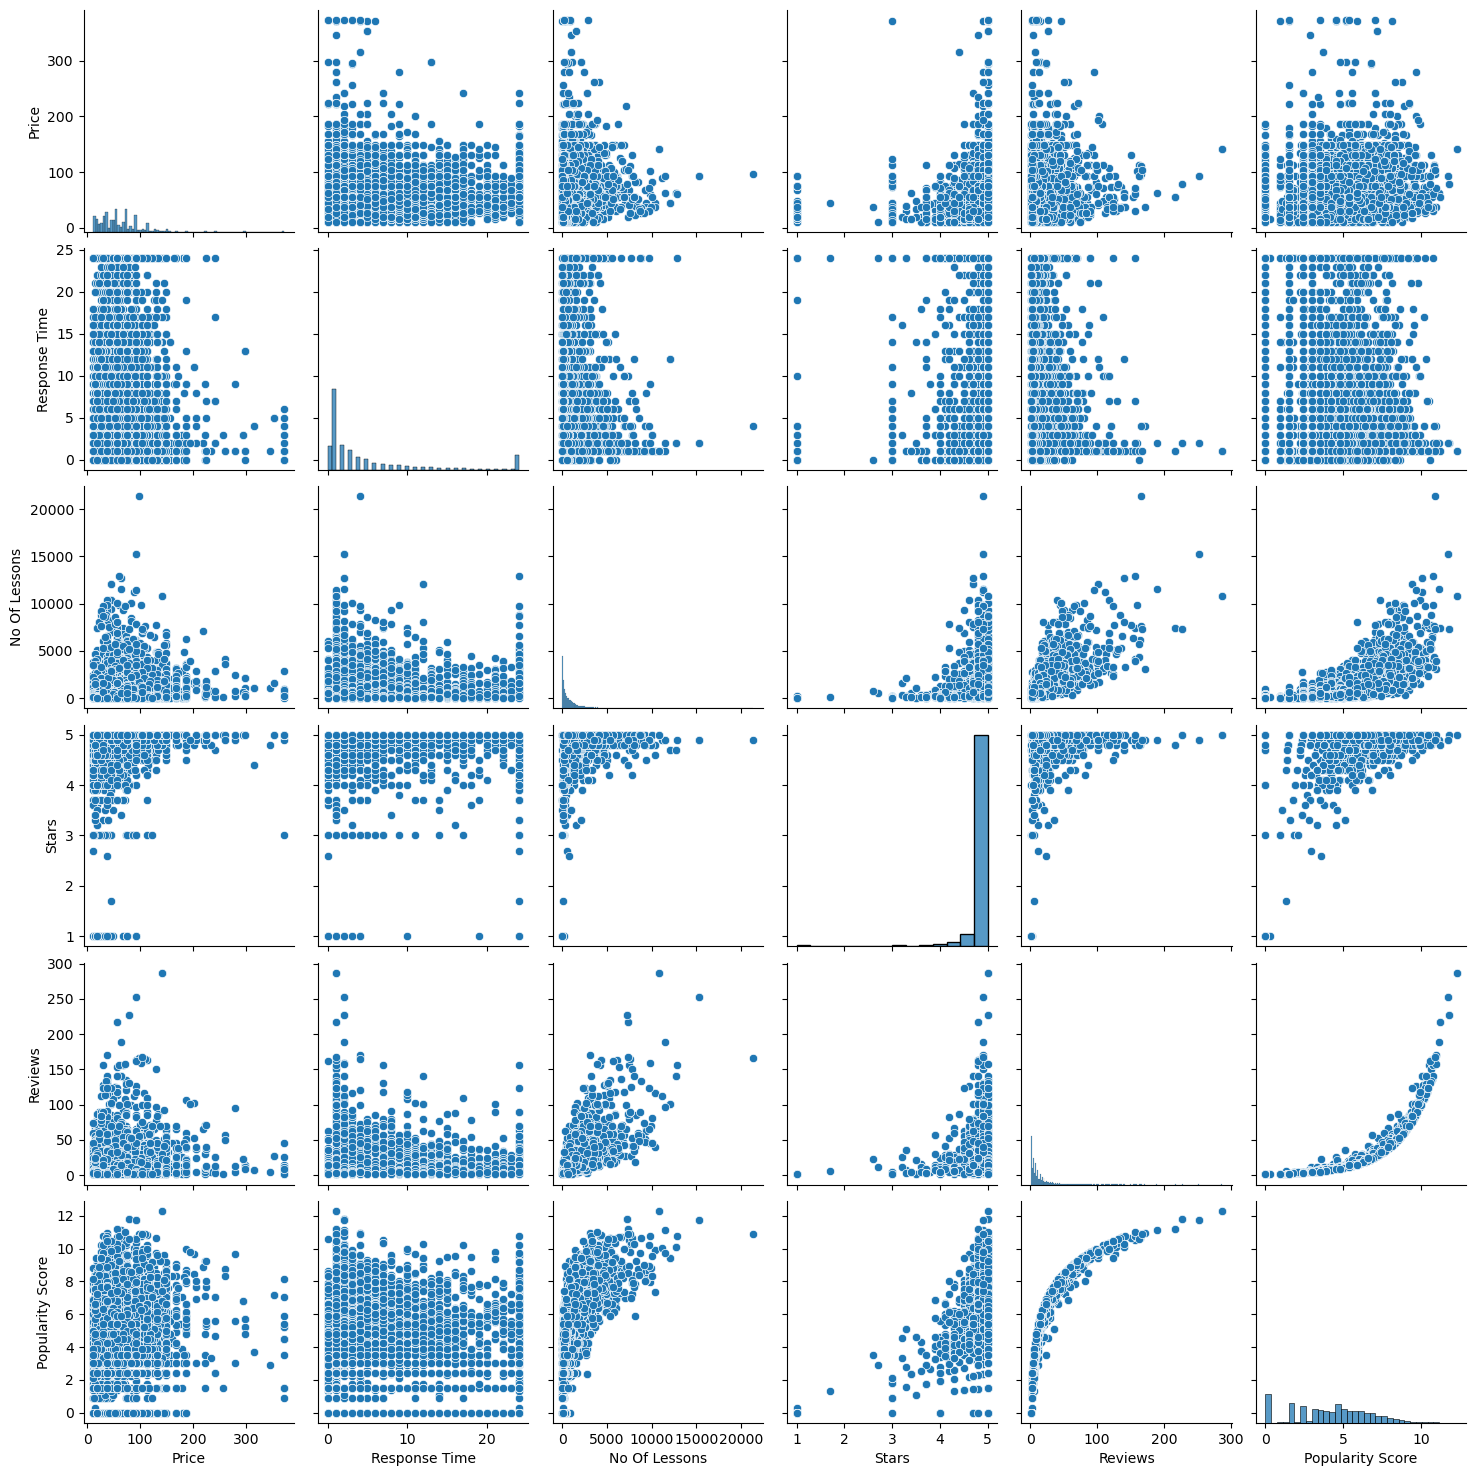

In [19]:
sns.pairplot(df2)
plt.show()

The correlation heatmap provides a visual representation of the correlation coefficients between pairs of variables in the dataset. Upon analyzing the heatmap, we observe a strong positive correlation between the popularity score and the number of lessons taught. This suggests that as the number of lessons increases, the popularity score of the tutors also tends to rise.

However, in contrast to this significant correlation, we observe little to no correlation between the other variables in the dataset. This indicates that variables such as English level, price, and response time do not exhibit a strong linear relationship with the popularity score or with each other.

These findings highlight the importance of teaching experience, as represented by the number of lessons taught, in determining a tutor's popularity. While other variables may still influence a tutor's success, they do not demonstrate a strong linear relationship in the context of the dataset.

Understanding these correlations helps us identify the key factors that contribute to a tutor's popularity and prioritize them in further analysis and decision-making processes.

C:\Users\edent\AppData\Local\Temp\ipykernel_16152\2851988266.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Popularity Score'], ax=axs[0])


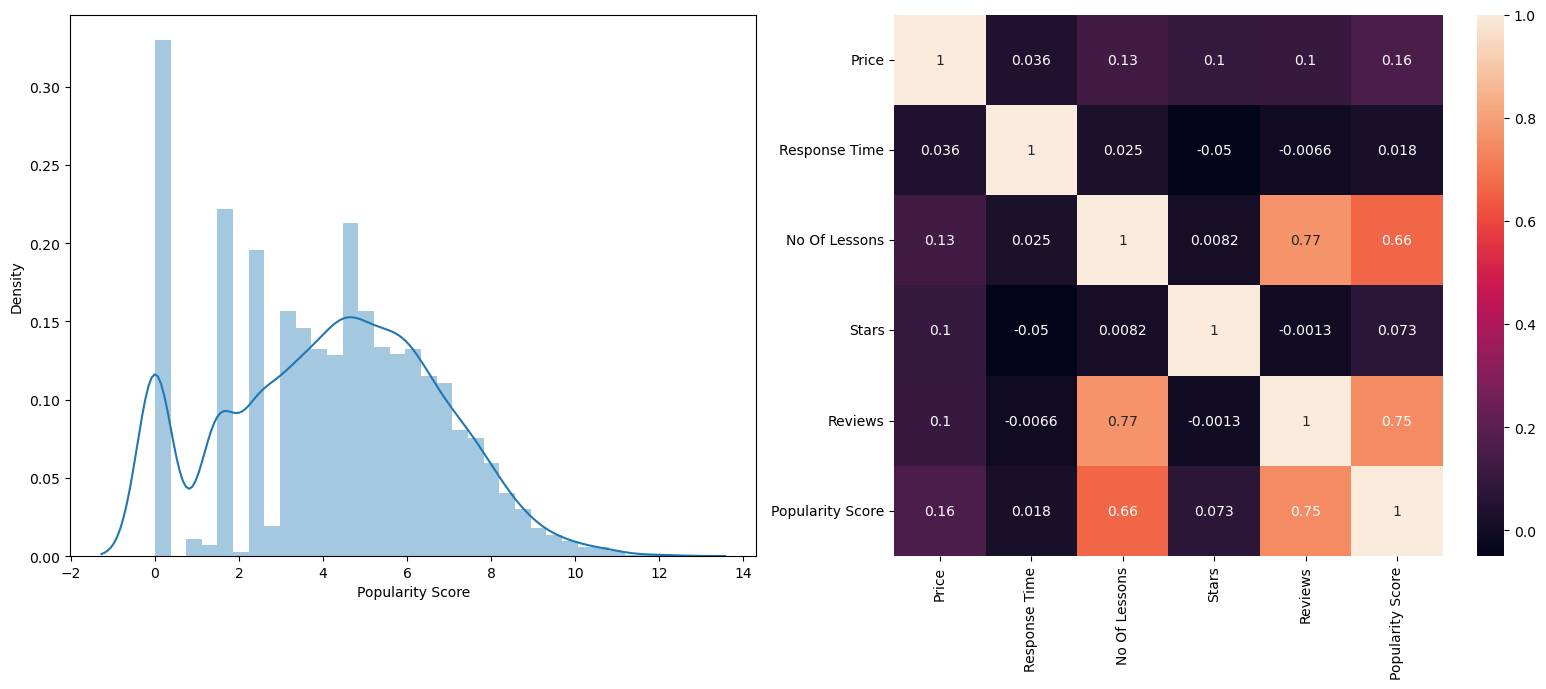

In [20]:
corr = df2.corr(numeric_only=True)
fig, axs = plt.subplots(1, 2, figsize=[16, 7])
sns.distplot(df2['Popularity Score'], ax=axs[0])
sns.heatmap(corr, ax=axs[1], annot=True)
fig.tight_layout()
plt.show()


In [21]:
# df2.to_csv('Data Frame (After Setp 3).csv')